In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
calender = pd.read_csv(r"C:\Users\HP\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\calendar.csv")
listing = pd.read_csv(r"C:\Users\HP\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\listings.csv")
review = pd.read_csv(r"C:\Users\HP\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\reviews.csv")
host = pd.read_csv(r"C:\Users\HP\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\hosts.csv")

# MERGING 4 TABLES

In [8]:
Airbnb = calender.merge(listing, on='listing_id')

In [9]:
Airbnb1 = pd.merge(Airbnb, host[['host_id', 'host_since']], on='host_id', how='inner')

In [10]:
Airbnb1.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,...,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000
1,2109,40334325,2022-02-14 00:00:00.000000,1,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000
2,3617,40334325,2022-04-26 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000
3,5560,40334325,2022-04-08 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000
4,8188,40334325,2022-04-11 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000


In [6]:
Airbnb1.shape


(319192, 22)

# Merging AIRBNB1 WITH REVIEW

In [11]:
Airbnb1 = pd.merge(Airbnb1, review['listing_id'], on='listing_id', how='inner')

In [12]:
Airbnb1.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,...,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000
1,2109,40334325,2022-02-14 00:00:00.000000,1,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000
2,3617,40334325,2022-04-26 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000
3,5560,40334325,2022-04-08 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000
4,8188,40334325,2022-04-11 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23 00:00:00.000000


In [9]:
Airbnb1.shape

(11468769, 22)

# handled missing values by imputing means or specific values, converted date columns to datetime format, calculated the years since registration, and performed some exploratory data analysis (EDA) such as visualizing distributions and correlations.

In [10]:
Airbnb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11468769 entries, 0 to 11468768
Data columns (total 22 columns):
 #   Column          Dtype  
---  ------          -----  
 0   calender_id     int64  
 1   listing_id      int64  
 2   date            object 
 3   available       int64  
 4   price           float64
 5   adjusted_price  float64
 6   minimum_nights  int64  
 7   maximum_nights  int64  
 8   listing_url     object 
 9   name            object 
 10  description     object 
 11  latitude        float64
 12  longitude       float64
 13  property_type   object 
 14  room_type       object 
 15  accomodates     int64  
 16  bathrooms_text  object 
 17  bedrooms        float64
 18  beds            float64
 19  amenities       object 
 20  host_id         int64  
 21  host_since      object 
dtypes: float64(6), int64(7), object(9)
memory usage: 2.0+ GB


In [11]:
Airbnb1.isna().sum()

calender_id             0
listing_id              0
date                    0
available               0
price                 496
adjusted_price        496
minimum_nights          0
maximum_nights          0
listing_url             0
name                    0
description        122750
latitude                0
longitude               0
property_type           0
room_type               0
accomodates             0
bathrooms_text          0
bedrooms          1182745
beds                97016
amenities               0
host_id                 0
host_since              0
dtype: int64

In [12]:
Airbnb1["price"].fillna(Airbnb1["price"].mean(),inplace = True)
Airbnb1["adjusted_price"].fillna(Airbnb1["adjusted_price"].mean(),inplace = True)
Airbnb1["bedrooms"].fillna(Airbnb1["bedrooms"].mean(),inplace= True)
Airbnb1["beds"].fillna(Airbnb1["beds"].mean(),inplace= True)

In [13]:
Airbnb1.isna().sum()

calender_id            0
listing_id             0
date                   0
available              0
price                  0
adjusted_price         0
minimum_nights         0
maximum_nights         0
listing_url            0
name                   0
description       122750
latitude               0
longitude              0
property_type          0
room_type              0
accomodates            0
bathrooms_text         0
bedrooms               0
beds                   0
amenities              0
host_id                0
host_since             0
dtype: int64

In [14]:
Airbnb1["description"].fillna(Airbnb1["description"].mode(),inplace= True)

In [15]:
Airbnb1.isna().sum()

calender_id            0
listing_id             0
date                   0
available              0
price                  0
adjusted_price         0
minimum_nights         0
maximum_nights         0
listing_url            0
name                   0
description       122750
latitude               0
longitude              0
property_type          0
room_type              0
accomodates            0
bathrooms_text         0
bedrooms               0
beds                   0
amenities              0
host_id                0
host_since             0
dtype: int64

In [16]:
specific_value = "No description available"
Airbnb1['description'].fillna(specific_value, inplace=True)

In [17]:
Airbnb1.isna().sum()

calender_id       0
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
listing_url       0
name              0
description       0
latitude          0
longitude         0
property_type     0
room_type         0
accomodates       0
bathrooms_text    0
bedrooms          0
beds              0
amenities         0
host_id           0
host_since        0
dtype: int64

In [17]:
# Assuming 'host_since' column is in string format
Airbnb1['host_since'] = pd.to_datetime(Airbnb1['host_since'])

In [20]:
# Get the current date
current_date = pd.Timestamp.now()


In [21]:
 #Calculate the time difference in years
Airbnb1['years_since_registration'] = (current_date - Airbnb1['host_since']).dt.days / 365

In [22]:
Airbnb1.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,...,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since,years_since_registration
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
1,2109,40334325,2022-02-14 00:00:00.000000,1,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
2,3617,40334325,2022-04-26 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
3,5560,40334325,2022-04-08 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
4,8188,40334325,2022-04-11 00:00:00.000000,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575


In [23]:
# Extract date and time components
Airbnb1['date'] = pd.to_datetime(Airbnb1['date'])

In [24]:
Airbnb1['date'] = Airbnb1['date'].dt.date

In [25]:
Airbnb1.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,...,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since,years_since_registration
0,1,40334325,2022-08-03,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
1,2109,40334325,2022-02-14,1,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
2,3617,40334325,2022-04-26,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
3,5560,40334325,2022-04-08,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
4,8188,40334325,2022-04-11,0,56.0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,...,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575


In [25]:
Airbnb1.shape


(11468769, 23)

In [31]:
Airbnb1.skew()

calender_id       0.003613
listing_id        0.877253
date             -0.002238
available        -0.178177
price             3.224587
adjusted_price    3.285960
minimum_nights    4.108953
maximum_nights   -1.962958
listing_url       0.582437
name              0.035821
description      -0.050932
latitude         -0.402561
longitude         0.166409
property_type     1.417125
room_type         1.421688
accomodates       2.087254
bathrooms_text    2.120432
bedrooms          2.264151
beds              3.710615
amenities        -0.272810
host_id           0.065858
host_since        0.082737
dtype: float64

In summary, skewness measures the asymmetry of the distribution. A positive skewness indicates a longer right tail, while a negative skewness indicates a longer left tail. Very high skewness values suggest highly skewed distributions, which might need transformation for certain types of analyses or modeling.

In [32]:
Airbnb1.kurtosis()

calender_id       -1.200962
listing_id        -0.058211
date              -1.203099
available         -1.968253
price             14.789510
adjusted_price    15.512517
minimum_nights    16.746114
maximum_nights     1.999478
listing_url       -1.042712
name              -1.256386
description       -1.259056
latitude          -0.828660
longitude         -0.966856
property_type      0.387779
room_type          0.062401
accomodates        5.235853
bathrooms_text     7.668881
bedrooms           3.571828
beds              19.533370
amenities         -1.029738
host_id           -1.189470
host_since        -1.113746
dtype: float64

kurtosis measures the peakedness of the distribution. Positive kurtosis values indicate heavier tails and a more peaked distribution (leptokurtic), while negative kurtosis values indicate lighter tails and a flatter distribution (platykurtic).

In [26]:
import numpy as np

In [33]:
Airbnb1['price'].median()

70.0

In [34]:
Airbnb1['accomodates'].median()

3.0

In [35]:
Airbnb1['listing_id'].value_counts()

4502646     109512
8766126     101520
8587634      81354
10845191     78780
28693154     74466
             ...  
53296271       167
10582792       164
11320350       164
18711244       160
31899599       158
Name: listing_id, Length: 1525, dtype: int64

In [36]:
Airbnb1['available'].median()

1.0

In [37]:
Airbnb1['bedrooms'].median()


1.0

In [38]:
Airbnb1['beds'].median()

2.0

In [39]:
Airbnb1['amenities'].mode()

0    ["Refrigerator", "Kitchen", "Smoke alarm", "Sh...
Name: amenities, dtype: object

In [40]:
Airbnb1['maximum_nights'].median()

1125.0

In [41]:
Airbnb1['minimum_nights'].median()

2.0

In [26]:
Airbnb1.drop(columns=['calender_id','date','adjusted_price','listing_url'], inplace=True)

In [27]:
Airbnb1.head()

,listing_id,available,price,minimum_nights,maximum_nights,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since,years_since_registration
0,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
1,40334325,1,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
2,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
3,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
4,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575


In [28]:
cont1 =Airbnb1.select_dtypes(include=np.number)

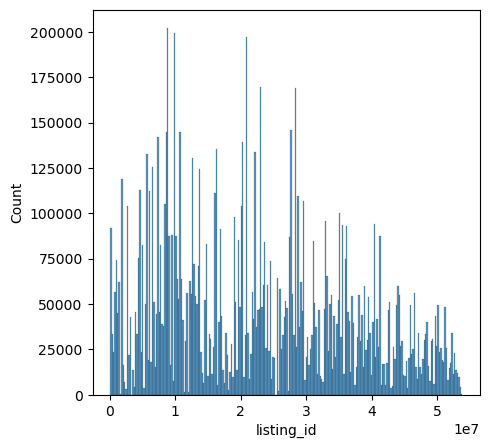

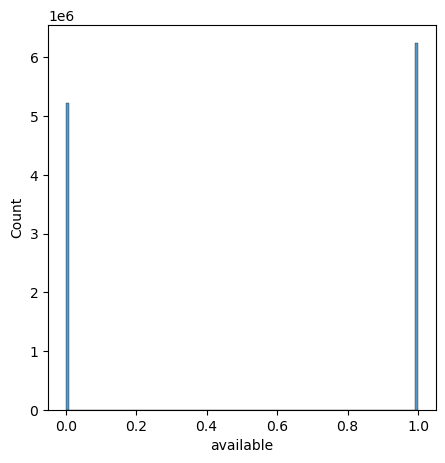

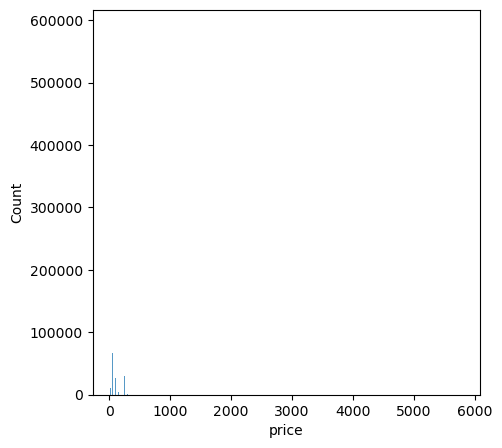

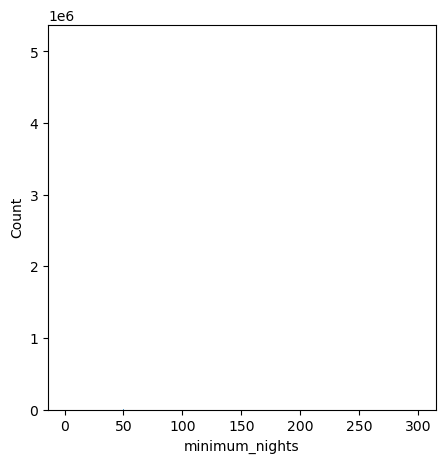

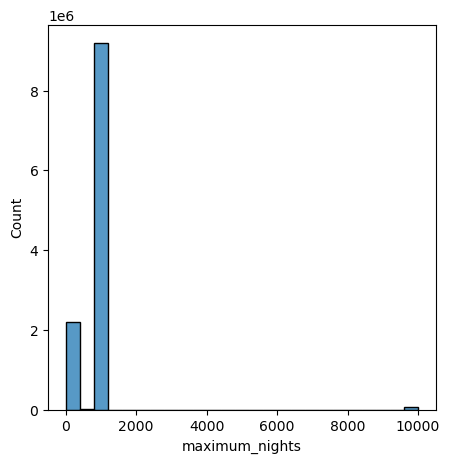

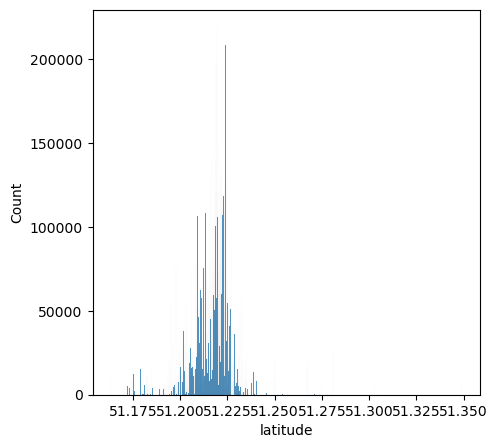

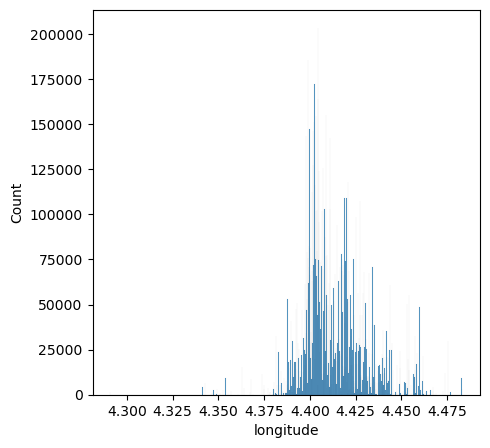

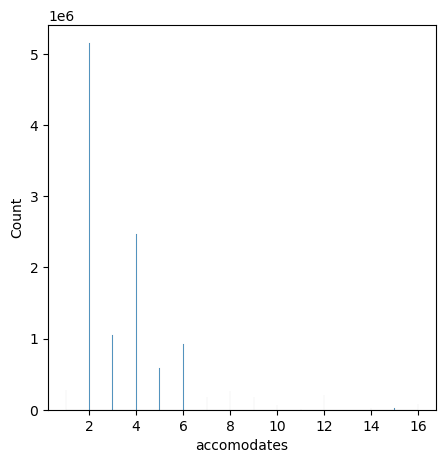

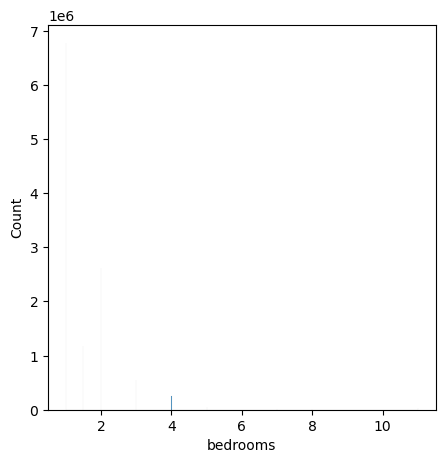

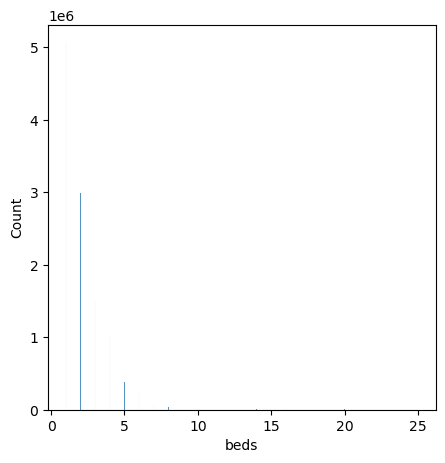

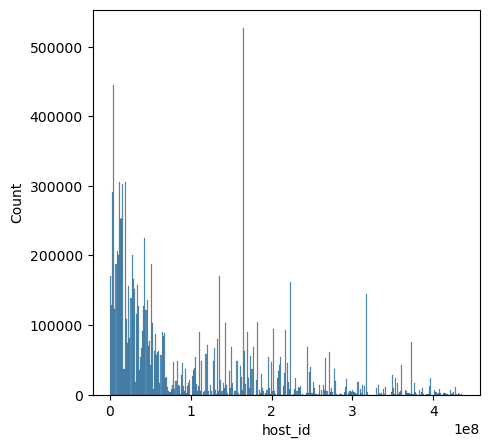

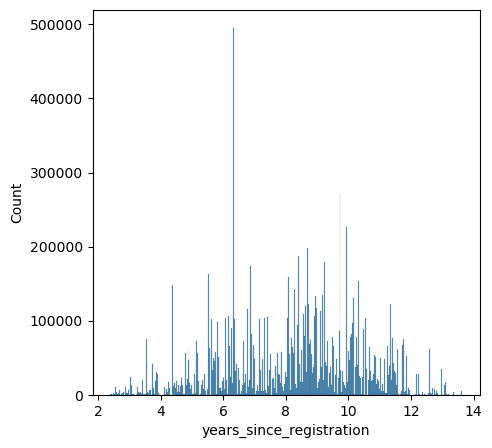

In [29]:
for i in cont1:
    plt.figure(figsize =(5,5))
    sns.histplot(x=i,data = cont1)
    plt.show()

# categorical column comes under obj

In [30]:
obj = Airbnb1.select_dtypes(include ='object')

In [31]:
obj

,name,description,property_type,room_type,bathrooms_text,amenities
0,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Refrigerator"", ""Private entranc..."
1,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Refrigerator"", ""Private entranc..."
2,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Refrigerator"", ""Private entranc..."
3,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Refrigerator"", ""Private entranc..."
4,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Refrigerator"", ""Private entranc..."
...,...,...,...,...,...,...
11468764,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",Private room in rental unit,Private room,1 shared bath,"[""Hot water"", ""Fire extinguisher"", ""Long term ..."
11468765,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",Private room in rental unit,Private room,1 shared bath,"[""Hot water"", ""Fire extinguisher"", ""Long term ..."
11468766,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",Private room in rental unit,Private room,1 shared bath,"[""Hot water"", ""Fire extinguisher"", ""Long term ..."
11468767,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",Private room in rental unit,Private room,1 shared bath,"[""Hot water"", ""Fire extinguisher"", ""Long term ..."


In [53]:
Airbnb1['property_type'].value_counts()

Entire rental unit                     6701581
Entire loft                             879240
Private room in townhouse               662255
Private room in residential home        555838
Private room in rental unit             518908
Entire residential home                 437630
Entire townhouse                        428108
Entire condominium (condo)              323864
Room in boutique hotel                  245106
Private room in guesthouse               94148
Private room                             84034
Private room in bed and breakfast        83289
Entire serviced apartment                73581
Entire guest suite                       68095
Private room in loft                     42471
Private room in condominium (condo)      36066
Room in aparthotel                       34552
Yurt                                     34161
Private room in guest suite              33123
Private room in boat                     30032
Entire cottage                           24486
Shared room i

In [54]:
Airbnb1['room_type'].value_counts()

Entire home/apt    9028770
Private room       2405862
Shared room          23277
Hotel room           10860
Name: room_type, dtype: int64

In [58]:
Airbnb1['bathrooms_text'].value_counts()

1 bath               5435786
1.5 baths            2946115
1 private bath        645384
1 shared bath         626222
1.5 shared baths      591049
2.5 baths             391623
2 baths               390067
2.5 shared baths      127300
3.5 baths             108610
2 shared baths         86937
3 baths                50953
Shared half-bath       22080
Half-bath              20297
5 baths                 7347
4 shared baths          6771
8.5 baths               6369
3 shared baths          2606
8 baths                 1098
0 shared baths           892
Private half-bath        706
0 baths                  372
6.5 baths                185
Name: bathrooms_text, dtype: int64

In [60]:
Airbnb1['bathrooms_text'].mode()

0    1 bath
Name: bathrooms_text, dtype: object

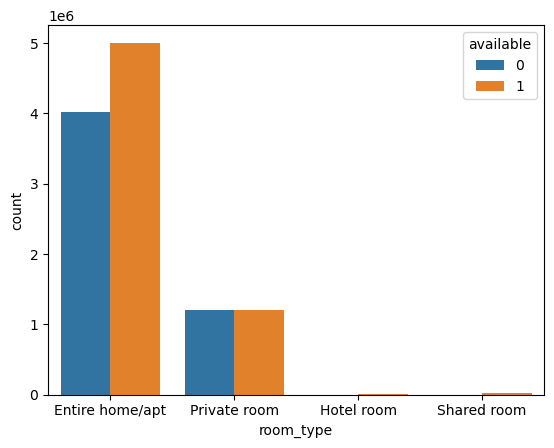

In [62]:
Airbnb1.room_type.value_counts()
sns.countplot(x='room_type',hue ='available',data = Airbnb1)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20192\1869222148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Airbnb1.corr(),annot= True)


<Axes: >

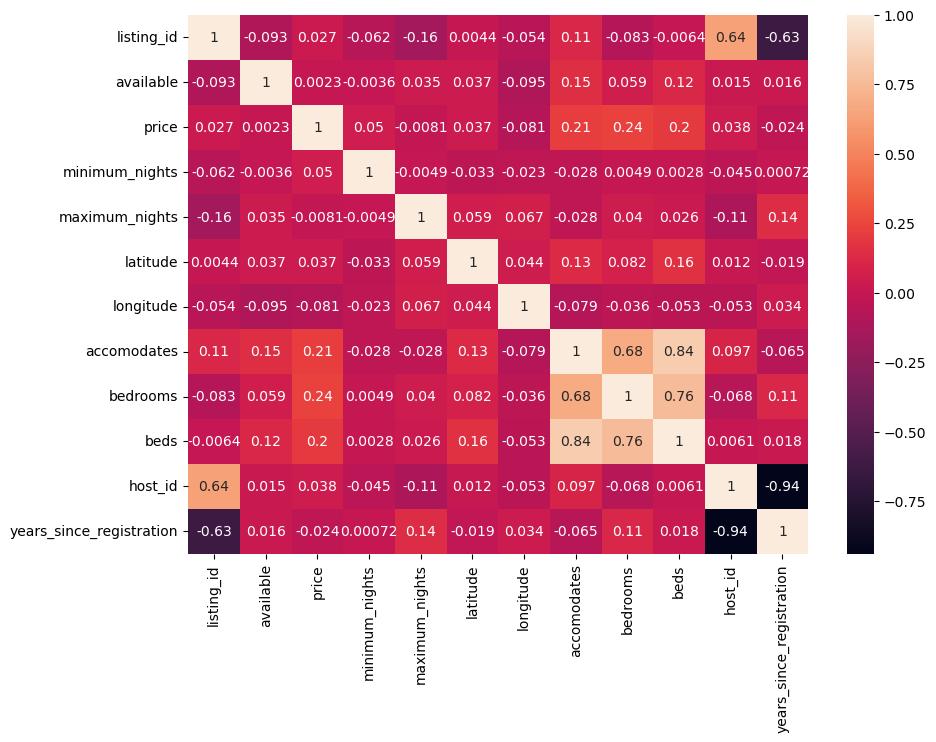

In [64]:
plt.figure(figsize =(10,7))
sns.heatmap(Airbnb1.corr(),annot= True)

Correlation Coefficient of 0.68: This indicates a moderately strong positive linear relationship between the two variables. As one variable increases, the other variable tends to increase as well, and vice versa. However, the relationship may not be perfectly linear. Correlation Coefficient of 0.76: This indicates a strong positive linear relationship between the two variables. The relationship is more pronounced compared to a correlation coefficient of 0.68, suggesting that the variables are more closely associated with each other. Correlation Coefficient of 0.84: This indicates a very strong positive linear relationship between the two variables. The variables are highly correlated, and the relationship between them is nearly linear. Changes in one variable are highly predictive of changes in the other variable.

# boxplot involves understanding the distribution of the data, including its central tendency, spread, and any potential outliers.

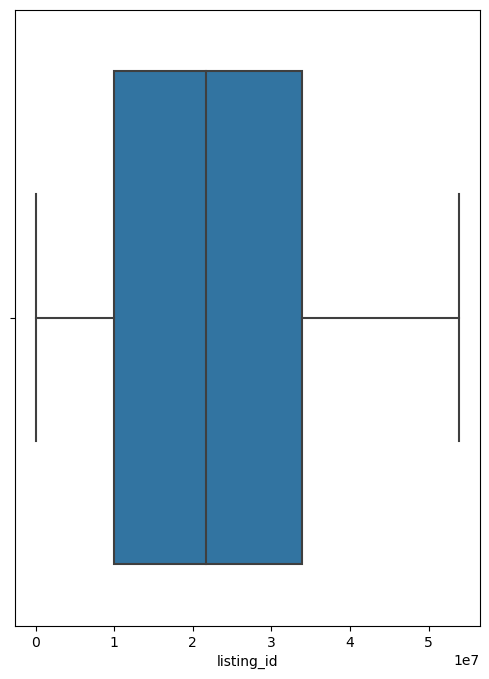

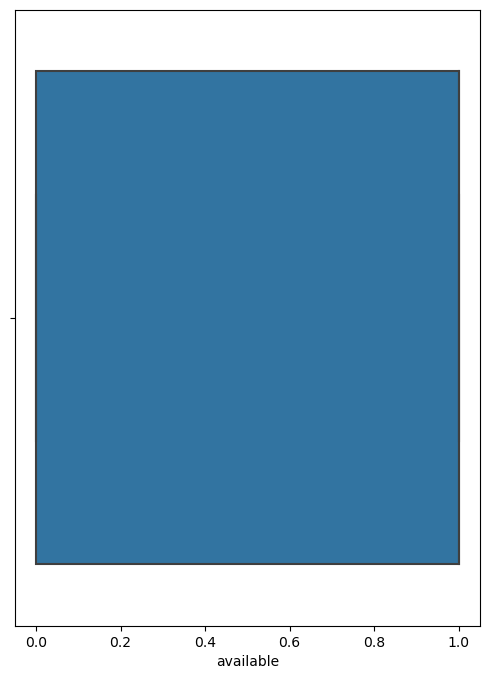

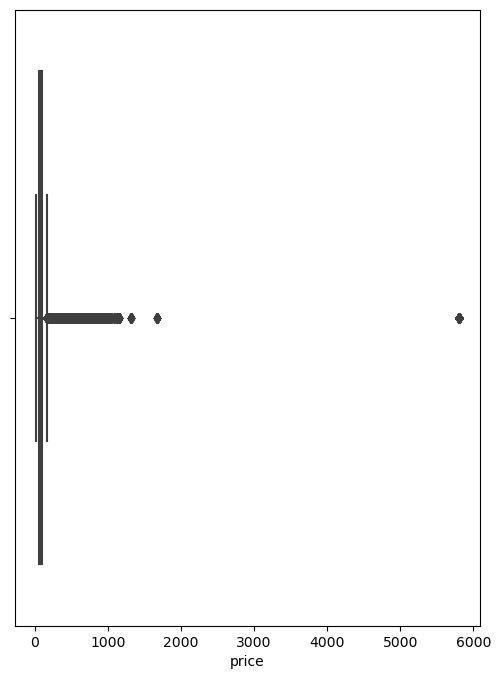

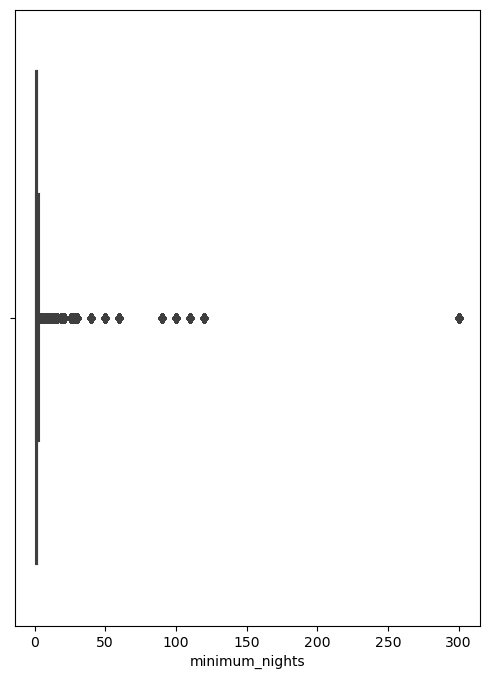

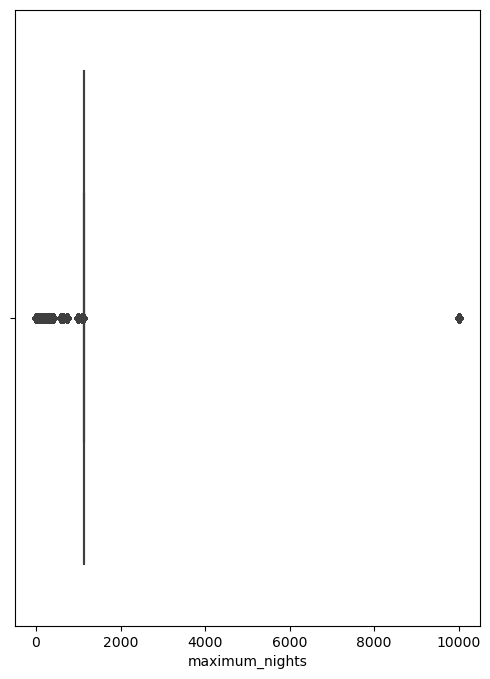

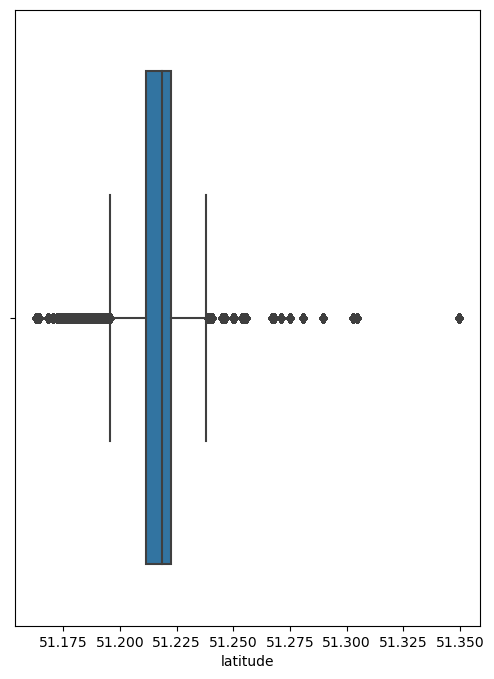

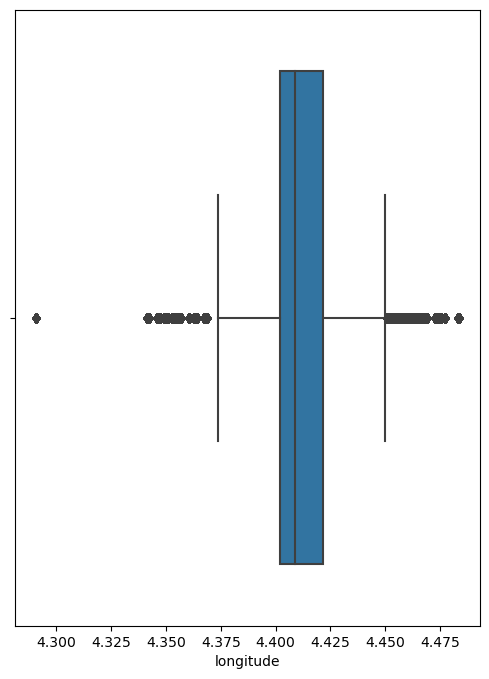

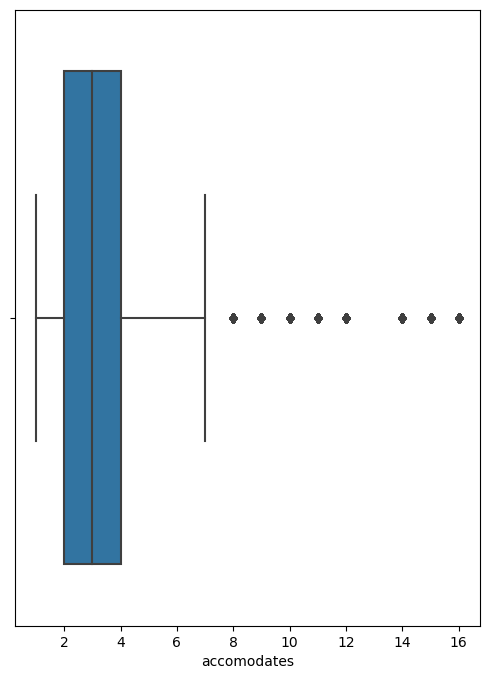

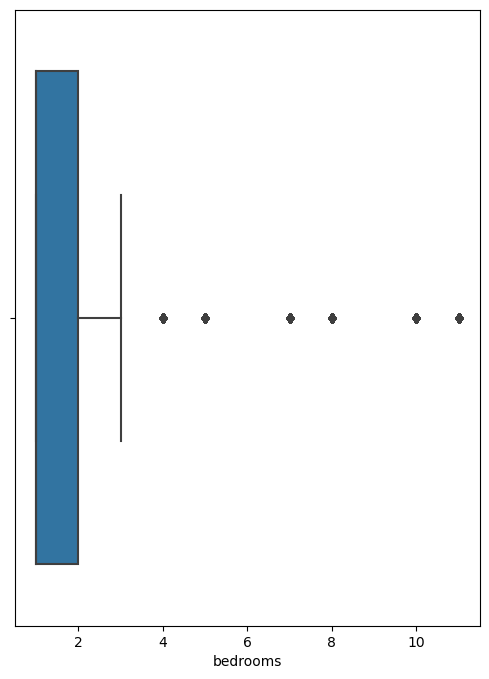

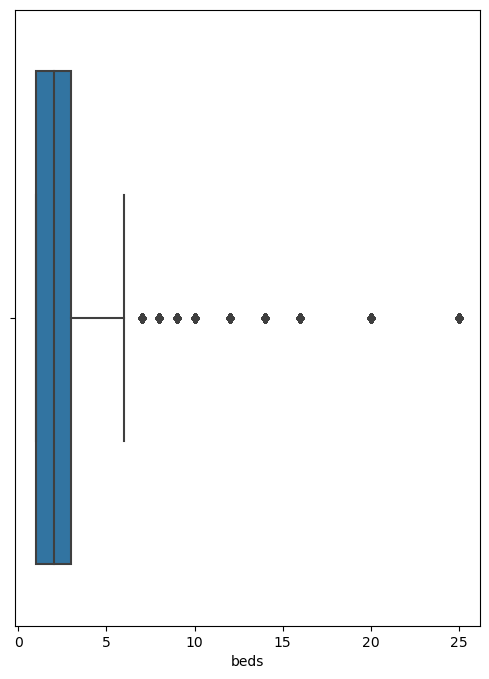

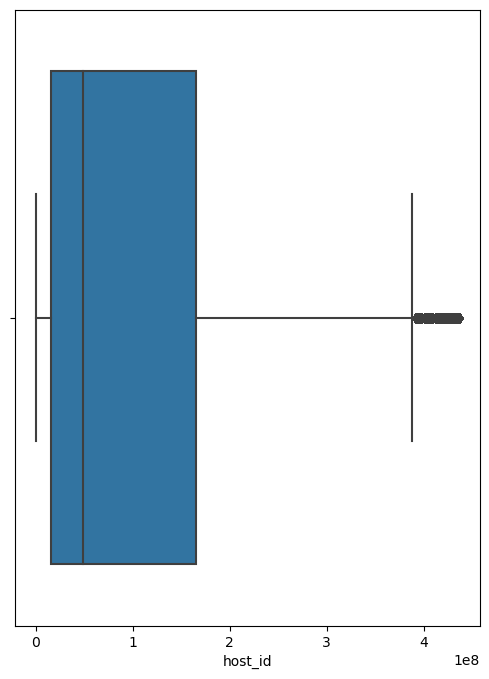

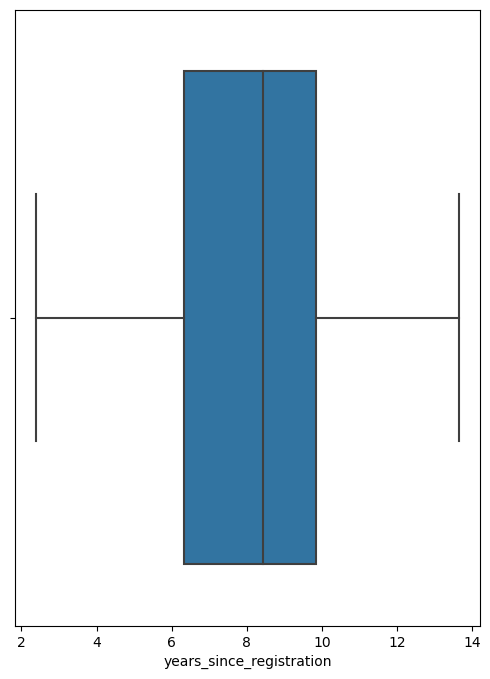

In [32]:
for i in cont1:
    plt.figure(figsize =(6,8))
    sns.boxplot(x=i,data = cont1)
    plt.show()

A KDE (Kernel Density Estimation) plot is a way to visualize the probability density function of a continuous random variable

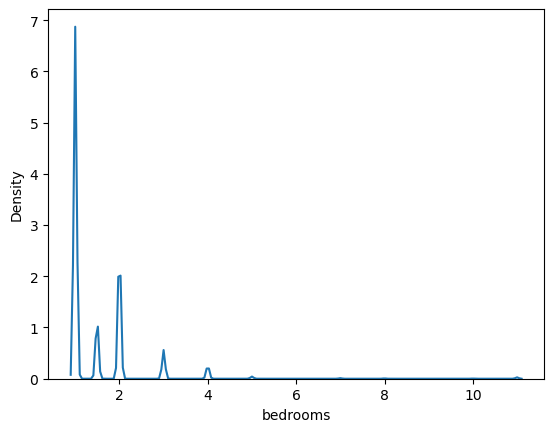

In [33]:
sns.kdeplot(Airbnb1["bedrooms"])
plt.show()

The peak(s) of the KDE plot indicate the central tendency of the distribution, showing where the most common number of bedrooms lies within the dataset.

C:\Users\HP\AppData\Local\Temp\ipykernel_20192\2998133828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Airbnb1["price"])


<Axes: xlabel='price', ylabel='Density'>

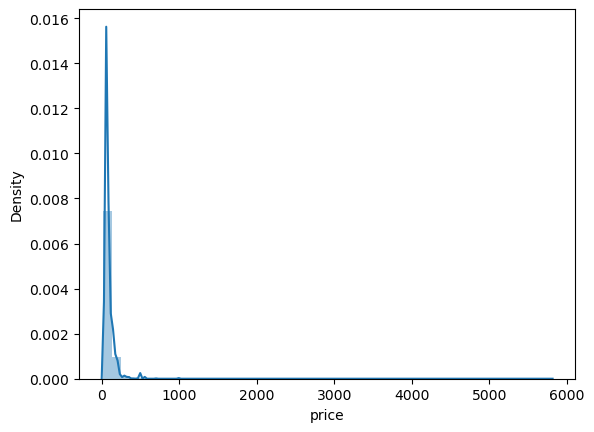

In [67]:
sns.distplot(Airbnb1["price"])

# importing MinMaxScaler is essential for standardizing the scale of input features, improving model performance, and ensuring the stability and interpretability of machine learning 

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
cont1= scale.fit_transform(cont1)
cont1= pd.DataFrame(cont1)
cont1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,11468769.0,0.422940,0.263251,0.0,0.185297,0.401817,0.629568,1.0
1,11468769.0,0.544369,0.498028,0.0,0.000000,1.000000,1.000000,1.0
2,11468769.0,0.013300,0.020311,0.0,0.007086,0.009679,0.014691,1.0
3,11468769.0,0.007488,0.027995,0.0,0.000000,0.003344,0.003344,1.0
4,11468769.0,0.098148,0.083072,0.0,0.112422,0.112422,0.112422,1.0
5,11468769.0,0.288972,0.061321,0.0,0.261044,0.299003,0.318250,1.0
6,11468769.0,0.634306,0.087296,0.0,0.577893,0.612870,0.678931,1.0
7,11468769.0,0.178232,0.164079,0.0,0.066667,0.133333,0.200000,1.0
8,11468769.0,0.049285,0.088532,0.0,0.000000,0.000000,0.100000,1.0
9,11468769.0,0.049603,0.071790,0.0,0.000000,0.041667,0.083333,1.0


In [35]:
Airbnb1.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,11468769.0,2.279420e+07,1.415612e+07,50904.000000,1.001510e+07,2.165832e+07,3.390546e+07,5.382519e+07
available,11468769.0,5.443685e-01,4.980276e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
price,11468769.0,9.095577e+01,1.175211e+02,14.000000,5.500000e+01,7.000000e+01,9.900000e+01,5.800000e+03
minimum_nights,11468769.0,3.238779e+00,8.370485e+00,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+02
maximum_nights,11468769.0,9.822816e+02,8.305506e+02,1.000000,1.125000e+03,1.125000e+03,1.125000e+03,9.999000e+03
latitude,11468769.0,5.121678e+01,1.143767e-02,51.162880,5.121157e+01,5.121865e+01,5.122224e+01,5.134940e+01
longitude,11468769.0,4.413001e+00,1.682187e-02,4.290770,4.402130e+00,4.408870e+00,4.421600e+00,4.483470e+00
accomodates,11468769.0,3.673475e+00,2.461185e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
bedrooms,11468769.0,1.492854e+00,8.853161e-01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+01
beds,11468769.0,2.190469e+00,1.722952e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,2.500000e+01


# outlier detection

In [70]:
#finding out the highest and the lowest allowed value
ul=Airbnb1['price'].mean()+(3*Airbnb1['price'].std())
ll=Airbnb1['price'].mean()-(3*Airbnb1['price'].std())

In [71]:
print('highest allowed value is',ul)
print('least allowed value is',ll)

highest allowed value is 443.51921956836793
least allowed value is -261.6076715959749


In [72]:
#find out outlier
Airbnb1[(Airbnb1['price']<ll)|(Airbnb1['price']>ul)]

,listing_id,available,price,minimum_nights,maximum_nights,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since,years_since_registration
265551,36963744,0,1000.0,1,999,Cathedral view studio apartment,"Featuring city views and free WiFi, Daily Apar...",51.22056,4.40143,Entire rental unit,Entire home/apt,4,1 bath,1.492854,1.0,"[""Hot water"", ""Refrigerator"", ""Long term stays...",277645495,2019-07-20,4.791781
265552,36963744,0,1000.0,1,999,Cathedral view studio apartment,"Featuring city views and free WiFi, Daily Apar...",51.22056,4.40143,Entire rental unit,Entire home/apt,4,1 bath,1.492854,1.0,"[""Hot water"", ""Refrigerator"", ""Long term stays...",277645495,2019-07-20,4.791781
265553,36963744,0,1000.0,1,999,Cathedral view studio apartment,"Featuring city views and free WiFi, Daily Apar...",51.22056,4.40143,Entire rental unit,Entire home/apt,4,1 bath,1.492854,1.0,"[""Hot water"", ""Refrigerator"", ""Long term stays...",277645495,2019-07-20,4.791781
265554,36963744,0,1000.0,1,999,Cathedral view studio apartment,"Featuring city views and free WiFi, Daily Apar...",51.22056,4.40143,Entire rental unit,Entire home/apt,4,1 bath,1.492854,1.0,"[""Hot water"", ""Refrigerator"", ""Long term stays...",277645495,2019-07-20,4.791781
265555,36963744,0,1000.0,1,999,Cathedral view studio apartment,"Featuring city views and free WiFi, Daily Apar...",51.22056,4.40143,Entire rental unit,Entire home/apt,4,1 bath,1.492854,1.0,"[""Hot water"", ""Refrigerator"", ""Long term stays...",277645495,2019-07-20,4.791781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270074,522693,1,500.0,2,21,Ahome Awayfromhome,<b>The space</b><br />Ahome. Away from home ! ...,51.22001,4.39813,Entire rental unit,Entire home/apt,4,1 bath,1.000000,2.0,"[""High chair"", ""Fire extinguisher"", ""Kitchen"",...",2562294,2012-06-06,11.915068
11270095,522693,1,500.0,2,21,Ahome Awayfromhome,<b>The space</b><br />Ahome. Away from home ! ...,51.22001,4.39813,Entire rental unit,Entire home/apt,4,1 bath,1.000000,2.0,"[""High chair"", ""Fire extinguisher"", ""Kitchen"",...",2562294,2012-06-06,11.915068
11270096,522693,1,500.0,2,21,Ahome Awayfromhome,<b>The space</b><br />Ahome. Away from home ! ...,51.22001,4.39813,Entire rental unit,Entire home/apt,4,1 bath,1.000000,2.0,"[""High chair"", ""Fire extinguisher"", ""Kitchen"",...",2562294,2012-06-06,11.915068
11270097,522693,1,500.0,2,21,Ahome Awayfromhome,<b>The space</b><br />Ahome. Away from home ! ...,51.22001,4.39813,Entire rental unit,Entire home/apt,4,1 bath,1.000000,2.0,"[""High chair"", ""Fire extinguisher"", ""Kitchen"",...",2562294,2012-06-06,11.915068


In [73]:
#Trimming---remove the outlier
Airbnb1[(Airbnb1['price']>ll)&(Airbnb1['price']<ul)]

,listing_id,available,price,minimum_nights,maximum_nights,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since,years_since_registration
0,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
1,40334325,1,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
2,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
3,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
4,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11468764,35379310,1,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1 shared bath,1.000000,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,2019-06-02,4.923288
11468765,35379310,1,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1 shared bath,1.000000,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,2019-06-02,4.923288
11468766,35379310,1,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1 shared bath,1.000000,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,2019-06-02,4.923288
11468767,35379310,1,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1 shared bath,1.000000,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,2019-06-02,4.923288


In [75]:
#winsorization
from scipy.stats.mstats import winsorize
Airbnb1['price']=winsorize(Airbnb1['price'],limits=[.1,.2])

<Axes: ylabel='price'>

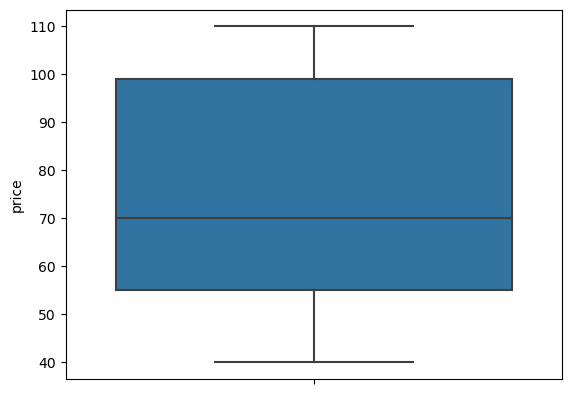

In [76]:
sns.boxplot(y=Airbnb1['price'],data=Airbnb1)

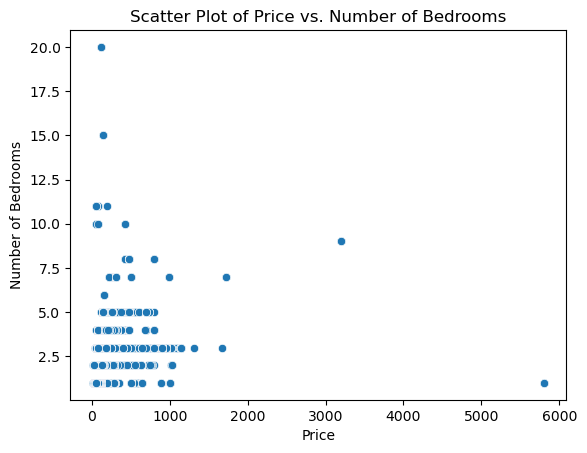

In [54]:
sns.scatterplot(x='price', y='bedrooms', data=Airbnb)
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')
plt.title('Scatter Plot of Price vs. Number of Bedrooms')
plt.show()


prices generally increasing with the number of bedrooms, it indicates a positive correlation between price and the size of the accommodation.

In [78]:
#finding out the highest and the lowest allowed value
ul=Airbnb1['accomodates'].mean()+(3*Airbnb1['accomodates'].std())
ll=Airbnb1['accomodates'].mean()-(3*Airbnb1['accomodates'].std())

In [79]:
print('highest allowed value is',ul)
print('least allowed value is',ll)

highest allowed value is 11.057028724448767
least allowed value is -3.7100787597228226


In [80]:
#find out outlier
Airbnb1[(Airbnb1['accomodates']<ll)|(Airbnb1['accomodates']>ul)]

,listing_id,available,price,minimum_nights,maximum_nights,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since,years_since_registration
359499,32135224,0,110.0,1,60,"The House on Kleine Goddaard, great 4 large gr...",A Large but super cosy charismatic house smack...,51.22405,4.40347,Entire townhouse,Entire home/apt,16,3.5 baths,5.0,10.0,"[""Refrigerator"", ""Smoke alarm"", ""Shampoo"", ""Ha...",51924769,2015-12-21,8.372603
359500,32135224,0,110.0,1,60,"The House on Kleine Goddaard, great 4 large gr...",A Large but super cosy charismatic house smack...,51.22405,4.40347,Entire townhouse,Entire home/apt,16,3.5 baths,5.0,10.0,"[""Refrigerator"", ""Smoke alarm"", ""Shampoo"", ""Ha...",51924769,2015-12-21,8.372603
359501,32135224,0,110.0,1,60,"The House on Kleine Goddaard, great 4 large gr...",A Large but super cosy charismatic house smack...,51.22405,4.40347,Entire townhouse,Entire home/apt,16,3.5 baths,5.0,10.0,"[""Refrigerator"", ""Smoke alarm"", ""Shampoo"", ""Ha...",51924769,2015-12-21,8.372603
359502,32135224,0,110.0,1,60,"The House on Kleine Goddaard, great 4 large gr...",A Large but super cosy charismatic house smack...,51.22405,4.40347,Entire townhouse,Entire home/apt,16,3.5 baths,5.0,10.0,"[""Refrigerator"", ""Smoke alarm"", ""Shampoo"", ""Ha...",51924769,2015-12-21,8.372603
359503,32135224,0,110.0,1,60,"The House on Kleine Goddaard, great 4 large gr...",A Large but super cosy charismatic house smack...,51.22405,4.40347,Entire townhouse,Entire home/apt,16,3.5 baths,5.0,10.0,"[""Refrigerator"", ""Smoke alarm"", ""Shampoo"", ""Ha...",51924769,2015-12-21,8.372603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946166,1328770,1,60.0,1,1125,Cosy historic Ship Hannus Antwerp,"Sailing vessel in the centre of Antwerp, ideal...",51.22875,4.40254,Private room in boat,Private room,16,2 shared baths,11.0,16.0,"[""Hot water"", ""Refrigerator"", ""Dishes and silv...",4193029,2012-11-19,11.460274
9946167,1328770,1,60.0,1,1125,Cosy historic Ship Hannus Antwerp,"Sailing vessel in the centre of Antwerp, ideal...",51.22875,4.40254,Private room in boat,Private room,16,2 shared baths,11.0,16.0,"[""Hot water"", ""Refrigerator"", ""Dishes and silv...",4193029,2012-11-19,11.460274
9946168,1328770,1,60.0,1,1125,Cosy historic Ship Hannus Antwerp,"Sailing vessel in the centre of Antwerp, ideal...",51.22875,4.40254,Private room in boat,Private room,16,2 shared baths,11.0,16.0,"[""Hot water"", ""Refrigerator"", ""Dishes and silv...",4193029,2012-11-19,11.460274
9946169,1328770,1,60.0,1,1125,Cosy historic Ship Hannus Antwerp,"Sailing vessel in the centre of Antwerp, ideal...",51.22875,4.40254,Private room in boat,Private room,16,2 shared baths,11.0,16.0,"[""Hot water"", ""Refrigerator"", ""Dishes and silv...",4193029,2012-11-19,11.460274


In [81]:
#Trimming---remove the outlier
Airbnb1[(Airbnb1['accomodates']>ll)&(Airbnb1['accomodates']<ul)]

,listing_id,available,price,minimum_nights,maximum_nights,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since,years_since_registration
0,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
1,40334325,1,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
2,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
3,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
4,40334325,0,56.0,3,5,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.492854,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,2019-11-23,4.446575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11468764,35379310,1,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1 shared bath,1.000000,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,2019-06-02,4.923288
11468765,35379310,1,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1 shared bath,1.000000,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,2019-06-02,4.923288
11468766,35379310,1,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1 shared bath,1.000000,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,2019-06-02,4.923288
11468767,35379310,1,60.0,1,1125,"Paz, conforto e tranquilidade tranquilidade","Espaço tranquilo ,quarto com guarda roupa med...",51.21017,4.45431,Private room in rental unit,Private room,1,1 shared bath,1.000000,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,2019-06-02,4.923288


Winsorization is a method commonly used to handle outliers in datasets. Outliers can skew statistical measures and distort the results of analyses or models. By winsorizing the data, extreme values are replaced with less extreme values, thereby reducing the impact of outliers.

In [82]:
#winsorization
from scipy.stats.mstats import winsorize
Airbnb1['accomodates']=winsorize(Airbnb1['accomodates'],limits=[.1,.2])

<Axes: ylabel='accomodates'>

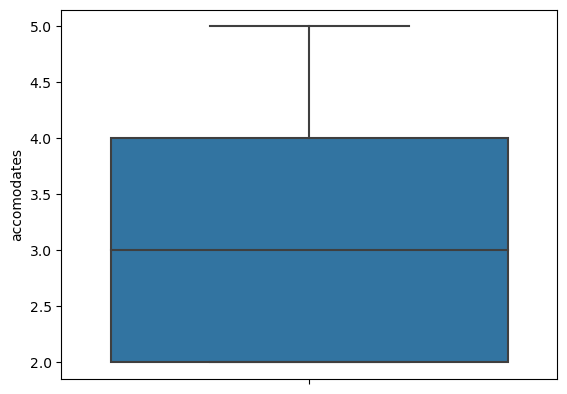

In [83]:
sns.boxplot(y=Airbnb1['accomodates'],data=Airbnb1)

<Axes: xlabel='room_type', ylabel='listing_id'>

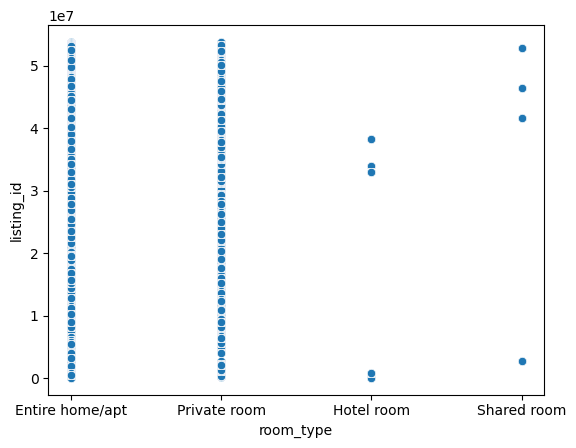

In [84]:
#scatter plot
sns.scatterplot(x='room_type',y='listing_id',data=Airbnb1)

In [86]:
obj.columns

Index(['name', 'description', 'property_type', 'room_type', 'bathrooms_text',
       'amenities'],
      dtype='object')

In [16]:
#convert categorical column into discrete
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
Airbnb1.columns

Index(['calender_id', 'listing_id', 'date', 'available', 'price',
       'adjusted_price', 'minimum_nights', 'maximum_nights', 'listing_url',
       'name', 'description', 'latitude', 'longitude', 'property_type',
       'room_type', 'accomodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'host_id', 'host_since'],
      dtype='object')

In [18]:
for i in Airbnb1:
    Airbnb1[i]=le.fit_transform(Airbnb1[i])

In [19]:
Airbnb1.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,...,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since
0,0,892,220,0,42,42,2,4,776,787,...,934,6,0,1,2,9,1,324,877,742
1,1833,892,50,1,42,42,2,4,776,787,...,934,6,0,1,2,9,1,324,877,742
2,3166,892,121,0,42,42,2,4,776,787,...,934,6,0,1,2,9,1,324,877,742
3,4834,892,103,0,42,42,2,4,776,787,...,934,6,0,1,2,9,1,324,877,742
4,7134,892,106,0,42,42,2,4,776,787,...,934,6,0,1,2,9,1,324,877,742


In [20]:
#segregating data into x and y
X=Airbnb1.drop('price',axis=1)
y=Airbnb1['price']

In [21]:
from sklearn.model_selection import train_test_split

In [93]:
#split x and y into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [94]:
print(X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11468769, 18) (11468769,) (9175015, 18) (2293754, 18) (9175015,) (2293754,)


In [95]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [96]:
#train the model on train data
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
y_test_pred=lr.predict(X_test)

In [98]:
x_range=[i for i in range(len(X_test))]

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


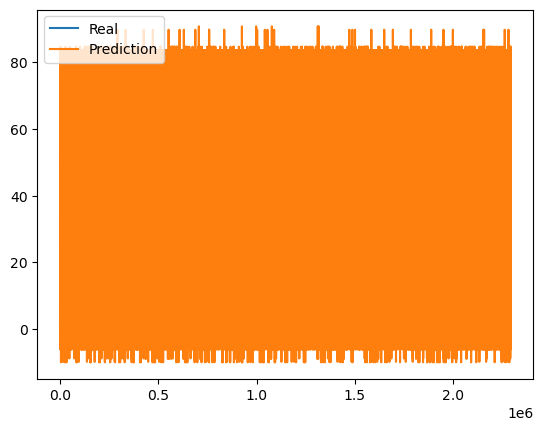

In [99]:
plt.plot(x_range,y_test)
plt.plot(x_range,y_test_pred)
plt.legend(['Real','Prediction'])

In [100]:
Airbnb1_result=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

In [101]:
Airbnb1_result['Difference']=Airbnb1_result['Actual']-Airbnb1_result['Predicted']

In [102]:
Airbnb1_result

,Actual,Predicted,Difference
10495345,0,14.297705,-14.297705
11313526,26,36.964922,-10.964922
598142,9,34.681844,-25.681844
8521687,0,12.507608,-12.507608
9006123,25,39.323561,-14.323561
...,...,...,...
5665181,21,37.546171,-16.546171
1237865,71,52.870852,18.129148
8072617,30,35.227734,-5.227734
6719371,0,18.244069,-18.244069


In [103]:
#RMSE of test data
error=Airbnb1_result['Difference']
sq_error=error*error
mean_sq_error=np.mean(sq_error)
root_mean_sq_error=np.sqrt(mean_sq_error)

In [104]:
root_mean_sq_error

19.194452839820222

In [105]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.3998252978975112

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [115]:
Airbnb1.columns

Index(['listing_id', 'available', 'price', 'minimum_nights', 'maximum_nights',
       'name', 'description', 'latitude', 'longitude', 'property_type',
       'room_type', 'accomodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'host_id', 'host_since', 'years_since_registration'],
      dtype='object')

In [118]:
for i in Airbnb1:
    Airbnb1[i]=le.fit_transform(Airbnb1[i])

In [119]:
#convert categorical column into discrete
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [120]:
Airbnb1.head()

,listing_id,available,price,minimum_nights,maximum_nights,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_since,years_since_registration
0,892,0,16,2,4,787,621,395,934,6,0,0,2,1,1,324,877,742,100
1,892,1,16,2,4,787,621,395,934,6,0,0,2,1,1,324,877,742,100
2,892,0,16,2,4,787,621,395,934,6,0,0,2,1,1,324,877,742,100
3,892,0,16,2,4,787,621,395,934,6,0,0,2,1,1,324,877,742,100
4,892,0,16,2,4,787,621,395,934,6,0,0,2,1,1,324,877,742,100


In [40]:
# Feature engineering

features = ['listing_id','available','minimum_nights','maximum_nights',
        'latitude', 'longitude','room_type', 'accomodates','bedrooms','beds',
        'host_id','years_since_registration']       
X =Airbnb1[features]
y = Airbnb1['price']

In [41]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [143]:
# Model evaluation
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [144]:
print("Linear Regression Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Linear Regression Metrics:
Mean Absolute Error: 15.915350752035785
Mean Squared Error: 374.38615689519247
R-squared: 0.3898413981855732


In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [146]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, tree_predictions)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)


In [147]:
print("\nDecision Tree Regression Metrics:")
print(f"Mean Absolute Error: {tree_mae}")
print(f"Mean Squared Error: {tree_mse}")
print(f"R-squared: {tree_r2}")



Decision Tree Regression Metrics:
Mean Absolute Error: 3.3165672498791956
Mean Squared Error: 55.599227727054554
R-squared: 0.9093867483423046


In [42]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [43]:
print("\nRandom Forest Regression Metrics:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")


Random Forest Regression Metrics:
Mean Absolute Error: 7.27675577029008
Mean Squared Error: 406.4900103890249
R-squared: 0.891226074072737


In [44]:
# Gradient Boosting Machine (GBM)
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)

In [45]:
print("\nGradient Boosting Machine Metrics:")
print(f"Mean Absolute Error: {gbm_mae}")
print(f"Mean Squared Error: {gbm_mse}")
print(f"R-squared: {gbm_r2}")


Gradient Boosting Machine Metrics:
Mean Absolute Error: 20.922814302073945
Mean Squared Error: 1252.5360182259938
R-squared: 0.6648299919170124


In [46]:
pip install lightgbm

In [47]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb

In [48]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# XGBoost Model Training
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
# LightGBM Model Training
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.314204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 9175015, number of used features: 12
[LightGBM] [Info] Start training from score 74.130495


LGBMRegressor()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [52]:
# Model Evaluation
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

lgb_predictions = lgb_model.predict(X_test)
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_r2 = r2_score(y_test, lgb_predictions)

In [53]:
# Print Metrics
print("XGBoost Metrics:")
print(f"Mean Absolute Error: {xgb_mae}")
print(f"Mean Squared Error: {xgb_mse}")
print(f"R-squared: {xgb_r2}")

print("\nLightGBM Metrics:")
print(f"Mean Absolute Error: {lgb_mae}")
print(f"Mean Squared Error: {lgb_mse}")
print(f"R-squared: {lgb_r2}")

XGBoost Metrics:
Mean Absolute Error: 8.433731893063667
Mean Squared Error: 425.39722181326135
R-squared: 0.886166634572655

LightGBM Metrics:
Mean Absolute Error: 12.059722197325254
Mean Squared Error: 530.7925495606028
R-squared: 0.8579635710767102


To compare the performance of these regression models for predicting Airbnb data, we can look at the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared values. Lower MAE and MSE indicate better performance, while a higher R-squared value suggests a better fit of the model to the data.

Here's a summary of the metrics for each model:

Linear Regression:
MAE: 15.92
MSE: 374.39
R-squared: 0.3898
Decision Tree Regression:
MAE: 3.32
MSE: 55.60
R-squared: 0.9094
Random Forest Regression:
MAE: 7.28
MSE: 406.49
R-squared: 0.8912
Gradient Boosting Machine (GB):
MAE: 20.92
MSE: 1252.54
R-squared: 0.6648
XGBoost:
MAE: 8.43
MSE: 425.40
R-squared: 0.8862
LightGBM:
MAE: 12.06
MSE: 530.79
R-squared: 0.8580
From these metrics, it appears that the Decision Tree Regression model performs the best, with the lowest MAE and MSE, and the highest R-squared value. Therefore, the Decision Tree Regression model might be the best choice for predicting Airbnb data among the models compared here.








# the top 5 most important predictors and also the impact of these top 5 predictors on the response variable

In [22]:
from sklearn.ensemble import RandomForestRegressor


In [23]:
# Define features and target variable
features = ['listing_id', 'available', 'minimum_nights', 'maximum_nights', 'latitude', 
            'longitude', 'room_type', 'accomodates', 'bedrooms', 'beds', 'host_id']  
X = Airbnb1[features]
y = Airbnb1['price']

In [24]:
# Train Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

RandomForestRegressor()

In [25]:
# Extract feature importances
feature_importances = rf_model.feature_importances_


In [26]:
# Create a dataframe to store feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})


In [27]:
# Sort dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [28]:
# Identify top 5 predictors
top_5_predictors = feature_importance_df.head(5)

In [29]:
# Print top 5 predictors
print("Top 5 Predictors:")
print(top_5_predictors)

Top 5 Predictors:
       Feature  Importance
7  accomodates    0.263061
4     latitude    0.133585
5    longitude    0.117728
8     bedrooms    0.101809
0   listing_id    0.099128


In [30]:
# Explain impact of top 5 predictors on response variable (price)
print("\nImpact on Response Variable (Price):")
for index, row in top_5_predictors.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


Impact on Response Variable (Price):
accomodates: 0.26306142340925737
latitude: 0.13358469052029767
longitude: 0.11772758915205285
bedrooms: 0.10180934062730138
listing_id: 0.09912817768766156


the top 5 predictors along with their feature importance scores. Additionally, it will explain the impact of each predictor on the response variable (price) based on these scores. The higher the importance score, the stronger the impact of the predictor on the target variable. 





